In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_columns', None,'display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
Member = pd.read_csv('~/Box Sync/KenyaPovertyTargetingModel/1data/KSPS/UNHCR-KEN-2018-SEA-Kalobeyei-Member.csv')
Nonfood = pd.read_csv('~/Box Sync/KenyaPovertyTargetingModel/1data/KSPS/UNHCR-KEN-2018-SEA-Kalobeyei-Nonfood.csv')
MergeTotalSpend = pd.read_excel('../2progs/MergeTotalSpend.xlsx',sheet_name='Sheet1',index_col = 0)

In [3]:
# Nonfood cleaning

Nonfood = Nonfood.rename(columns={"s1q2":"hhlocation", 
                        "s12q9":"purchased", 
                        "s12q10": "cost"})

Nonfood = Nonfood.drop(['weight','g_recall','nfcons_value',
                        'nfcons_value_capita','popweight',
                        's12q11'], axis=1)

NFSum = pd.DataFrame(Nonfood.groupby('hhid')['cost'].sum())

In [4]:
NFSum['cost'].describe()

count     1100.000000
mean       566.227334
std        671.954678
min          0.000000
25%        175.142148
50%        376.036130
75%        716.974637
max      10983.177150
Name: cost, dtype: float64

In [5]:
# Member cleaning
Member = Member.rename(columns={"s1q2":"hhlocation",
                                "s1q5":"interviewConsent",
                                "s2q8":"mainRespondent",
                                "s2q18":"hhHead",
                            #Demographic
                                "s2q11":"gender",
                                "s2q12":"ageRange",
                                "s2q13":"countryOfOrigin",
                            #Education
                                "s4q1":"anyEducation",
                                "s4q2":"currentlyInSchool",
                                "s4q3":"currentGrade",
                                "s4q4":"highestEducation",
                            ## Education -- Skills
                                "s4q5":"speaks",
                                "s4q6":"reads",
                                "s4q7":"writes",
                                "s4q8":"usesTech",
                                "s4q9":"drives",
                            # Employment 
                                "s5q1":"employee",
                                "s5q2":"employer",
                                "s5q3":"farmWorker",
                                "s5q4":"farmHelper",
                                "s5q5":"apprentice",
                                "s5q6":"volunteer",
                                "s5q20":"occupationStatus",
                                "s5q24":"numberOfIncomeActivities7days",
                            # Disabilities
                                "s9q2":"DifficultSeeing",
                                "s9q2_a":"glasses",
                                "s9q3":"DifficultHearing",
                                "s9q3_a":"hearingAid",
                                "s9q4":"difficultWalking",
                                "s9q5":"difficultMemory",
                                "s9q6":"difficultSelfCare",
                                "s9q7":"difficultCommunicate"})


Member = Member.drop(['weight',
# s5q7-14 ask about absenteeism at work
's5q7','s5q8','s5q9','s5q10','s5q11','s5q12','s5q13_1','s5q13_2','s5q13_3','s5q14','s5q14_b',
# s5q17-19 asks about what steps were taken in subject's job search
's5q17','s5q18','s5q19',
# s5q22 "How soon would he/she be able to start work if offered one"                 
's5q22',
# s5q23 is covered in s5q20
's5q23',
# Dr. told me to remove these
's5q25','s5q15','s5q16','s5q21','mainRespondent',
# Mean was 1                    
'interviewConsent' ,  
# Included in other sets
'ind_unique','indid','hhlocation',"s2q7a"
], axis=1)

MemberRaw=Member.copy()


In [6]:
## Cleaning variable inputs
Member.hhHead = MemberRaw.hhHead.map(dict(Yes=1, No=0))
Member.gender = MemberRaw.gender.map(dict(Female=1, Male=0))
Member.anyEducation = MemberRaw.anyEducation.map(dict(Yes=1, No=0))
Member.speaks = MemberRaw.speaks.map(dict(Yes=1, No=0))
Member.reads = MemberRaw.reads.map(dict(Yes=1, No=0))
Member.writes = MemberRaw.writes.map(dict(Yes=1, No=0))                                    
                                     

                                     


In [7]:
## Age Manipulation
ageDict = {"00 to 04": 0,
           "05 to 09": 1,
           "10 to 14": 2,
           "15 to 19": 3,
           "20 to 24": 4,
           "25 to 29": 5,
           "30 to 44": 6,
           "35 to 39": 7,
           "40 to 44": 8,
           "45 to 49": 9,
           "50 to 54": 10,
           "55 to 59": 11,
           "60 or more": 12}

Member.ageRange=Member.ageRange.replace(ageDict)


In [8]:
# combine highest education and current grade
Member.highestEducation = Member.highestEducation.fillna(Member.currentGrade)
Member.highestEducation = Member.highestEducation.fillna(0)
# turn into numbers
eduDict = {"Early childhood education":1,
           "Primary": 2,
           "Secondary": 3,
           "Vocational training (more than 1 year, with government certificate)":4,
           "University":5,
           "Other": 6}

Member.highestEducation=Member.highestEducation.replace(eduDict)




In [9]:
Member[Member['hhid'] == 12]

,hhid,hhHead,gender,ageRange,countryOfOrigin,anyEducation,currentlyInSchool,currentGrade,highestEducation,speaks,reads,writes,usesTech,drives,employee,employer,farmWorker,farmHelper,apprentice,volunteer,occupationStatus,numberOfIncomeActivities7days,DifficultSeeing,glasses,DifficultHearing,hearingAid,difficultWalking,difficultMemory,difficultSelfCare,difficultCommunicate,hhsize,famnum,famsize,speak_arabic,speak_english,speak_swahili,speak_other,read_arabic,read_english,read_swahili,read_other,write_arabic,write_english,write_swahili,write_other
11,12,1,1,6.0,South Sudan,0.0,NaN,NaN,0,1.0,0.0,0.0,No,No,No,No,No,No,No,No,Housewife / family responsibilities,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,Yes – a lot of difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,0,1,2.0,South Sudan,1.0,Yes,Primary,2,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,Yes – some difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,12,0,1,2.0,South Sudan,1.0,Yes,Primary,2,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,Yes – some difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,12,0,1,1.0,South Sudan,1.0,Yes,Early childhood education,1,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,Yes – some difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,12,0,0,1.0,South Sudan,1.0,Yes,Early childhood education,1,1.0,0.0,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,Yes – some difficulty,No – no difficulty,6,1,6,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,12,0,1,0.0,South Sudan,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,Yes – some difficulty,Yes – some difficulty,No – no difficulty,6,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Member[Member['hhid'] == 11]

,hhid,hhHead,gender,ageRange,countryOfOrigin,anyEducation,currentlyInSchool,currentGrade,highestEducation,speaks,reads,writes,usesTech,drives,employee,employer,farmWorker,farmHelper,apprentice,volunteer,occupationStatus,numberOfIncomeActivities7days,DifficultSeeing,glasses,DifficultHearing,hearingAid,difficultWalking,difficultMemory,difficultSelfCare,difficultCommunicate,hhsize,famnum,famsize,speak_arabic,speak_english,speak_swahili,speak_other,read_arabic,read_english,read_swahili,read_other,write_arabic,write_english,write_swahili,write_other
5,11,1,1,9.0,South Sudan,0.0,NaN,NaN,0,1.0,0.0,0.0,No,No,No,No,No,No,No,No,Other (specify),NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,Yes – some difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11,0,0,4.0,South Sudan,1.0,Yes,Secondary,3,1.0,1.0,1.0,Yes,Yes,No,No,No,No,No,Yes,NaN,1.0,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,Yes – some difficulty,6,1,6,yes,yes,yes,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN
7,11,0,0,3.0,South Sudan,1.0,Yes,Primary,2,1.0,1.0,1.0,Yes,No,No,No,No,No,No,No,Full time student / pupil,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,yes,NaN,yes,NaN,yes,NaN,yes,NaN,yes,NaN,yes
8,11,0,0,3.0,South Sudan,1.0,Yes,Primary,2,1.0,1.0,1.0,Yes,No,No,No,No,No,No,No,Full time student / pupil,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,yes,yes,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN
9,11,0,0,3.0,South Sudan,1.0,Yes,Primary,2,1.0,1.0,1.0,Yes,No,No,No,No,No,No,No,Full time student / pupil,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,yes,NaN,yes,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN
10,11,0,0,2.0,South Sudan,1.0,Yes,Primary,2,1.0,1.0,1.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No – no difficulty,NaN,No – no difficulty,NaN,No – no difficulty,No – no difficulty,No – no difficulty,No – no difficulty,6,1,6,yes,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN


In [11]:
#Member[Member['hhid'] = 72]----play around with this, may not have all hhid w/ age, create extra column w/ age unknown

In [12]:
# Create DF to test data regarding head of household
HeadMember = Member.query('hhHead==1')


foo = pd.DataFrame({
# Column to count hhsize
    'size': Member.groupby('hhid')['gender'].count(),
# Colomn for houshold head is female 
    'headFemale':HeadMember.groupby('hhid')['gender'].mean(),
# Column for share of house is female
    'shareFemale':Member.groupby('hhid')['gender'].mean(),
# Share by Age stuff
    'shareAgeZeroToFour':Member.query('ageRange==0').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFiveToNine':Member.query('ageRange==1').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeTenToFourteen':Member.query('ageRange==2').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFifteenToTwentyfour':Member.query('ageRange==3|ageRange==4').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeTwentyfivetofourtynine':Member.query('ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFiftyPlus':Member.query('ageRange==10|ageRange==11|ageRange==12').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareMaleAgeTenToNineteen':Member.query('gender==0&(ageRange==2|ageRange==3)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareFemaleAgeTenToNineteen':Member.query('gender==1&(ageRange==2|ageRange==3)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareMaleAgeTwentytoFourtynine':Member.query('gender==0&(ageRange==4|ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareFemaleAgeTwentytoFourtynine':Member.query('gender==1&(ageRange==4|ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
# Highest Education Shares
    'shareWithNoEducation': Member.query('highestEducation==0 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithEarlyChildhood': Member.query('highestEducation==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithPrimary':Member.query('highestEducation==2 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithSecondary':Member.query('highestEducation==3 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithVocational':Member.query('highestEducation==4 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithUniversity':Member.query('highestEducation==5 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithOther':Member.query('highestEducation==6 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
# Share 5-10 that speaks
    'shareSpeaks': Member.query('speaks==1 & ageRange==1').
                        groupby('hhid')['speaks'].count()/
                        Member.query('ageRange==1').
                            groupby('hhid')['ageRange'].count(),
# Reads
    'shareReads':Member.query('reads==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWrites':Member.query('writes==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    }).fillna(0)

# change it to NA if there is no person for the last ones for share speaks

foo.shareSpeaks.min()

0.0

In [13]:
NFSum.describe()

,cost
count,1100.000000
mean,566.227334
std,671.954678
min,0.000000
25%,175.142148
50%,376.036130
75%,716.974637
max,10983.177150


In [14]:

NFSum

,cost
hhid,
10,1031.994440
11,94.158150
12,282.654090
14,159.810690
15,596.885089
...,...
5977,210.000000
5986,618.490350
5992,0.000000


In [15]:
Nonfood.isnull().sum()

hhid              0
hhlocation        0
hhsize            0
hhmod             0
mod_opt           0
item_name         0
purchased         0
cost          11803
dtype: int64

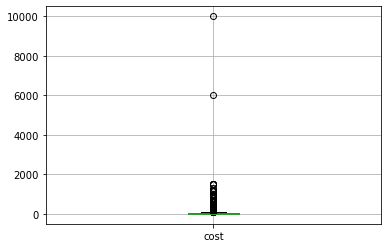

In [16]:
Nonfood.boxplot(column=['cost'])

In [17]:
#Outlier Treatment
Nonfood['cost'] = np.where(Nonfood['cost'] > 2000, 2000, Nonfood['cost'])

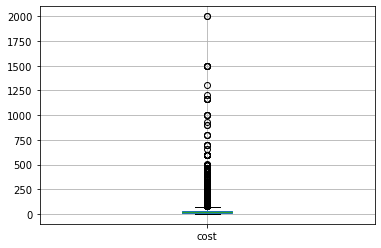

In [18]:
#Even using outliers it still looks skewed 
Nonfood.boxplot(column=['cost'])

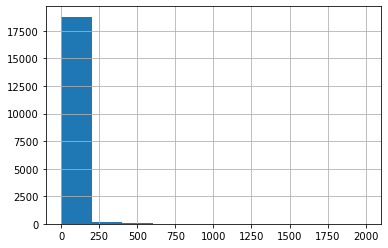

In [19]:
#Most households have a cost of zero and the 20 mean is just due to the very high numbers 
Nonfood.cost.hist()

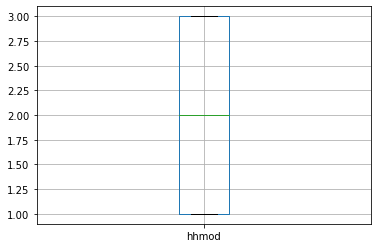

In [20]:
Nonfood.boxplot(column=['hhmod'])

In [21]:
#foo['total_share_age'] = foo['shareAgeZeroToFour'] + foo['shareAgeFiveToNine'] + foo['shareAgeTenToFourteen']+ foo['shareAgeFifteenToTwentyfour']+ foo['shareAgeTwentyfivetofourtynine']+ foo['shareAgeFiftyPlus']

In [22]:
#add every household share to 1, tabulate to 1, find household that doesn't equal 1
#unknown category?----
#aggregate up to household level----then merge!

In [23]:
foo[['headFemale', 'shareFemale','shareAgeZeroToFour','shareAgeFiveToNine', 'shareAgeTenToFourteen', 
    'shareAgeFifteenToTwentyfour', 'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus','shareMaleAgeTenToNineteen',
    'shareFemaleAgeTenToNineteen', 'shareMaleAgeTwentytoFourtynine', 'shareFemaleAgeTwentytoFourtynine',
    'shareWithNoEducation', 'shareWithEarlyChildhood', 'shareWithPrimary', 'shareWithSecondary', 'shareWithVocational',
    'shareWithUniversity', 'shareWithOther', 'shareSpeaks', 'shareReads', 'shareWrites']].describe().T[['mean', 'std', 'count']].set_axis(['Head Female', 'Share Female', '% Members Aged 0-4', '% Members Aged 5-9',
                                                                                                                                          '% Members Aged 10-14', '% Members Aged 15-24', '% Members Aged 25-49',
                                                                                                                                          '% Members Over Age 50', '% Male Members Aged 10-19', '% Female Members Aged 10-19',
                                                                                                                                          '% Male Members Aged 20-49', '% Female Members Aged 20-49', '% Members with No Education',
                                                                                                                                          '% Members with Early Childhood Education', '% Members with Primary Education',
                                                                                                                                       '% Members with Secondary Education',  '% Members with Vocational Education',
                                                                                                                                           '% Members with University Education',  '% Members with Other Education',
                                                                                                                                          '% Members who Speak', '% Members who Read', '% Members who Write'], axis = 'index').set_axis(['Mean', 'Std', 'N'], axis='columns')                      

#kids who speak vs. members? ---N should be 18000
                                                                                                                                           
#only 3 significant digits, N has no significant digits                                                                                                                                         
#means should add up to 1 for overlapping                                                                                                                                                                                                                   
#bring food dataset to 1100----N= 1100, aggregate food/member datasets

,Mean,Std,N
Head Female,0.656364,0.475138,1100.0
Share Female,0.486591,0.256838,1100.0
% Members Aged 0-4,0.190559,0.166233,1100.0
% Members Aged 5-9,0.189400,0.167080,1100.0
% Members Aged 10-14,0.147136,0.155367,1100.0
% Members Aged 15-24,0.221062,0.254292,1100.0
% Members Aged 25-49,0.219246,0.231350,1100.0
% Members Over Age 50,0.014324,0.072152,1100.0
% Male Members Aged 10-19,0.156110,0.197156,1100.0
% Female Members Aged 10-19,0.115277,0.152121,1100.0


In [24]:
foo['issue'] = np.where(foo['shareAgeZeroToFour'] + foo['shareAgeFiveToNine'] + foo['shareAgeTenToFourteen'] + 
                                        foo['shareAgeFifteenToTwentyfour'] + foo['shareAgeTwentyfivetofourtynine']+
                                        foo['shareAgeFiftyPlus'] == 1, True, False)

In [25]:
foo[['size','shareAgeZeroToFour', 'shareAgeFiveToNine', 'shareAgeTenToFourteen', 'shareAgeFifteenToTwentyfour',
    'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus', 'issue']]

,size,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,issue
hhid,,,,,,,,
10,5,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,True
11,6,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,False
12,6,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,False
14,14,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,False
15,2,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,True
...,...,...,...,...,...,...,...,...
5977,15,0.000000,0.133333,0.333333,0.400000,0.066667,0.066667,True
5986,2,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,True
5992,1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,True


In [26]:
foo.describe()

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,shareFemaleAgeTenToNineteen,shareMaleAgeTwentytoFourtynine,shareFemaleAgeTwentytoFourtynine,shareWithNoEducation,shareWithEarlyChildhood,shareWithPrimary,shareWithSecondary,shareWithVocational,shareWithUniversity,shareWithOther,shareSpeaks,shareReads,shareWrites
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.00000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,5.758182,0.656364,0.486591,0.190559,0.18940,0.147136,0.221062,0.219246,0.014324,0.156110,0.115277,0.161147,0.154910,0.438554,0.000909,0.278645,0.156437,0.024394,0.015303,0.016667,0.654061,0.462970,0.449712
std,3.087100,0.475138,0.256838,0.166233,0.16708,0.155367,0.254292,0.231350,0.072152,0.197156,0.152121,0.266550,0.138785,0.441994,0.030151,0.388479,0.312530,0.130078,0.107795,0.109571,0.472966,0.447563,0.442634
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,0.500000,0.200000,0.20000,0.142857,0.166667,0.166667,0.000000,0.125000,0.000000,0.066667,0.142857,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000
75%,8.000000,1.000000,0.666667,0.333333,0.30000,0.250000,0.333333,0.250000,0.000000,0.250000,0.200000,0.200000,0.200000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,21.000000,1.000000,1.000000,0.750000,0.80000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
FinalMerge = pd.merge(foo, MergeTotalSpend, how = "inner", on = "hhid")

In [28]:
FinalMerge.to_excel('FinalMerge.xlsx',sheet_name='Sheet1')